In [1]:
import pandas as pd
import re # Регулярные выражения.
import datetime 
import numpy as np
from gensim.models.word2vec import Word2Vec # Собственно модель.
from gensim.models.word2vec import LineSentence # Выравнивание текста по предложениям.
from gensim.models import KeyedVectors # Семантические вектора.

# Импортируем библиотеки Word2Vec
from gensim.models.word2vec import Word2Vec # Собственно модель.
from gensim.models.word2vec import LineSentence # Выравнивание текста по предложениям.
from gensim.models import KeyedVectors # Семантические вектора.
import matplotlib.pyplot as plt
from tqdm import tqdm

C:\Users\user\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
train = pd.read_csv('data_income/train.csv', sep = '\t')

In [3]:
def tagsdeliter(df):
    deltags = re.compile("<.+?>", re.S)
    
    df_preproc = df.copy()
    
    df_preproc['description'] = df_preproc['description'].apply(lambda x:  "".join(deltags.split(x)))  
    
    return df_preproc
        

In [4]:
train = train.pipe(tagsdeliter)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
id             200000 non-null int64
name           200000 non-null object
description    200000 non-null object
target         200000 non-null int64
dtypes: int64(2), object(2)
memory usage: 6.1+ MB


### Опробуем w2v

In [5]:
from getnewspaper import getNewsPaper
from getnewspaper import cosineSimilarity

In [12]:
""" ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!!! """
model_w2v = KeyedVectors.load_word2vec_format('data_income/news_upos_cbow_600_2_2018.vec.gz')

Функция векторизации текста. суммирует все вектора отдельных слов и делит на количество

In [6]:
def text_to_vec(dct, model, size):
    text_vec = np.zeros((size,), dtype="float32") # Return a new array of given shape and type, filled with zeros.
    n_words = 0

    index2word_set = set(model.index2word)
    for word in dct.keys():
        if word in index2word_set:
            n_words = n_words + 1
            text_vec = np.add(text_vec, model[word]) 
    
    if n_words != 0:
        text_vec /= n_words
    return text_vec

In [7]:
trainPos = getNewsPaper()

In [8]:
""" Просто пример одной из вакансий в минидатафрейме"""
jobtext = train.iloc[0,2]
type(jobtext)

str

In [9]:
""" Так можно получить частотный словарь по каждой вакансии"""
jobdict = trainPos.getArticleDictionary(jobtext) # Просто частотный словарь

In [13]:
""" Так можно получить частотный словарь по каждой вакансии формата W2V """
jobdictpos=trainPos.getArticleDictionary(jobtext, True) # частотный словарь формата W2V !!!!!!!
t2v=text_to_vec(jobdictpos, model_w2v, 600) # 600-т мерный Вектор данного словаря

<h1>Посмотрим как расположены данные в пространстве</h1> 


Создадим список словарей

In [14]:
""" Вычленим список вакансий"""
jobtext_dictlist_full = []
for description in range(len(train)): # tqdm(minitrain) взамен range(len(minitrain))
    
    jobdict = trainPos.getArticleDictionary(train.iloc[description,2], True)
    
    jobtext_dictlist_full.append(jobdict)
#jobtext_dictlist_full

In [15]:
import umap

In [16]:
umap_jobs=umap.UMAP()

In [17]:
""" Второй раз НЕ делать """
# создадим 600-тмерный массив словарей для каждого словаря из списка словарей lentaPos.dictionaries

w2v_vectors = np.array([text_to_vec(dct, model_w2v, 600) for dct in jobtext_dictlist_full]) 

In [18]:
jobtext_dictlist_full

[{'новый_ADJ': 2,
  'магазин_NOUN': 2,
  'хозтовары_NOUN': 3,
  'работа_NOUN': 5,
  'секция_NOUN': 4,
  'организация_NOUN': 3,
  'покупатель_NOUN': 2,
  'товар_NOUN': 6,
  'склад_NOUN': 2,
  'контроль_NOUN': 2,
  'торговый_ADJ': 2,
  'качество_NOUN': 3,
  'товарный_ADJ': 2,
  'знание_NOUN': 2,
  'опыт_NOUN': 2,
  'розничный_ADJ': 2,
  'торговля_NOUN': 2,
  'коллектив_NOUN': 2},
 {'работа_NOUN': 3,
  'станок_NOUN': 2,
  'опыт_NOUN': 2,
  'день_NOUN': 2,
  'неделя_NOUN': 2},
 {'знание_NOUN': 2,
  'базовый_ADJ': 2,
  'алгоритм_NOUN': 2,
  'обучение_NOUN': 3,
  'полный_ADJ': 2},
 {'год_NOUN': 2, 'рубль_NOUN': 2, 'час_NOUN': 2},
 {'дверной_ADJ': 2,
  'фурнитура_NOUN': 2,
  'работа_NOUN': 5,
  'магазин_NOUN': 2,
  'сеть_NOUN': 2,
  'отдел_NOUN': 2,
  'леруа_NOUN': 2,
  'мерлена_NOUN': 2,
  'косино_NOUN': 2,
  'парк_NOUN': 2,
  'обь_NOUN': 2,
  'контроль_NOUN': 3,
  'товар_NOUN': 3,
  'склад_NOUN': 2,
  'выкладка_NOUN': 2,
  'возврат_NOUN': 2},
 {'рабочий_ADJ': 2},
 {'работа_NOUN': 3},
 {'раб

<module 'shelve' from 'C:\\Users\\user\\Anaconda3\\lib\\shelve.py'>

### Сохранение и прочтение массивов

In [19]:
""" Сохраним спиок словарей. ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!! """
import shelve
my_dict = jobtext_dictlist_full
 #file to be used
shelf = shelve.open("jobtext_dictlist_full.shlf",flag='c')
 #serializing
shelf["my_dict"] = my_dict
shelf.close() # you must close the shelve file!!!

In [20]:
""" Прочитаем из файла спиок словарей """

shelf = shelve.open("jobtext_dictlist_full.shlf") # the same filename that you used before, please
jobtext_dictlist_read = shelf["my_dict"]
shelf.close()


In [21]:
""" Сохраним ПОЛНЫЙ массив. ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!! """
w2v_vectors_df = pd.DataFrame(w2v_vectors)
w2v_vectors_df.to_csv('w2v_vectors_df.csv', encoding= 'windows-1251')

In [22]:
""" Прочитаем из файла ПОЛНЫЙ массив"""
w2v_vectors_df = pd.read_csv('w2v_vectors_df.csv', encoding= 'windows-1251')


In [23]:
w2v_vectors = np.array(w2v_vectors_df.iloc[:,1:])
w2v_vectors.shape

(200000, 600)

### UMAP преобразование

Теперь попытаемся посмотреть, есть ли в описаниях вакансий какая-то скрытая структура. Для этого применим UMAP для отображения новостей на плоскость.

In [24]:
""" Полная версия ВТОРОЙ РАЗ НЕ ДЕЛАТЬ """

umaped_v = umap_jobs.fit_transform(w2v_vectors) #  применим к нему umap преобразование

C:\Users\user\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 127 separate connected components using meta-embedding (experimental)
  n_components


In [25]:
""" Прочитаем из файла ПОЛНЫЙ массив """
umaped_v_df = pd.read_csv('umaped_v_df.csv', encoding= 'windows-1251')
umaped_v = np.array(umaped_v_df.iloc[:,1:])


#""" Прочитаем из файла УМЕНЬШЕННЫЙ массив"""
#umaped_v_df_small = pd.read_csv('umaped_v_small_df_small.csv', encoding= 'windows-1251')
#umaped_v_small = np.array(umaped_v_df_small.iloc[:,1:])

FileNotFoundError: File b'umaped_v_df.csv' does not exist

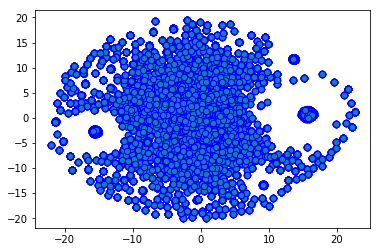

In [27]:
fig, ax = plt.subplots()
ax.scatter(umaped_v[:, 0], umaped_v[:, 1], edgecolor='b', s=40)
plt.show()

Структура очевидно есть. Хорошо бы попытаться выявить ее при помощи кластеризации.
Для начала попробуем метод k средних (k-means). Суть метода состоит в том, что мы кидаем k точек (центроидов) случайным образом. Далее мы определяем какие точки данных ближе к каким центроидам и пересчитываем положение центроидов. После нескольких шагов ситуация должна застабилизироваться.
Проведем такую кластеризацию и посмотрим на результаты.
Разным классам на рисунках ниже может соответствовать примерно один и тот же цвет. Но это не делает их одним и тем же кластером!

In [89]:
"""Сохраним ПОЛНЫЙ массив umaped_v . ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!!"""
#umaped_v_df = pd.DataFrame(umaped_v)
#umaped_v_df.to_csv('data_working/umaped_v_df.csv', encoding= 'windows-1251')


'Сохраним ПОЛНЫЙ массив umaped_v . ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!!'

### метод k средних (k-means)

In [28]:
from sklearn.cluster import KMeans

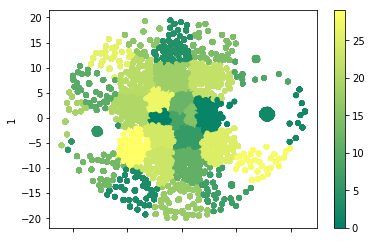

In [29]:
km=KMeans(n_clusters=30) # предположим что вакансии надо раскиджать на 30 !!!!  рубрик
km_clusters=km.fit_predict(umaped_v)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=km_clusters, cmap=plt.cm.summer)

In [94]:
""" Сохраним db_clusters. ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!!  """
#km_clusters_df = pd.DataFrame(km_clusters)
#km_clusters_df.to_csv('data_working/km_clusters_df.csv', encoding= 'windows-1251')

In [30]:
from sklearn.cluster import SpectralClustering

### Метод DBSCAN

Также попробуемм метод DBSCAN, который выделяет области с наибольшей плотностью точек и последовательно включает в кластер точки, находящиеся ближе определенной границы к точкам, уже включенным в кластер. Данному методу не надо указывать количество кластеров, он сам их определит. Но лучше задать правдоподобные параметры eps и min_samples.

In [33]:
from sklearn.cluster import DBSCAN

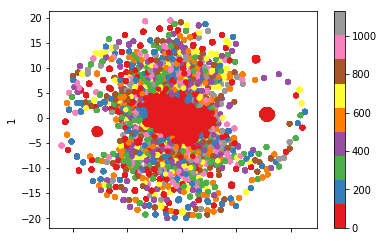

In [34]:
db=DBSCAN(eps=0.2, min_samples=3)
db_clusters=db.fit_predict(umaped_v)
ax=pd.DataFrame(umaped_v).plot.scatter(x=0, y=1, c=db_clusters, cmap=plt.cm.Set1)

In [77]:
""" Сохраним db_clusters. ВТОРОЙ РАЗ НЕ ДЕЛАТЬ !!!  """
#db_clusters_02_3_df = pd.DataFrame(db_clusters)
#db_clusters_02_3_df.to_csv('data_working/db_clusters_02_3_df.csv', encoding= 'windows-1251')

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

Но давайте взглянем какие вакансии объединились для каждого из кластеров. Итак:

### А что нам скажет тов. Д.Б.Скан ?

In [41]:
clusters=list(set(db_clusters))

for c in clusters:
    print("\n===============",c ,"===============\n")
    cntr=0
    for i in range(len(train)): 
        if db_clusters[i]==c:
            print("\n===============")
            print(train.iloc[i,3])
            #print(train.iloc[[i],[1,3]])
            cntr+=1
            if cntr==5:
                break


=============== 0 ===============


1

1

0

0

0

=============== 1 ===============


0

0

0

0

0

=============== 2 ===============


0

0

0

0

0

=============== 3 ===============


0

0

0

0

0

=============== 4 ===============


0

1

1

1

1

=============== 5 ===============


1

1

0

0

0

=============== 6 ===============


1

1

0

0

0

=============== 7 ===============


1

0

0

0

1

=============== 8 ===============


0

0

0

0

0

=============== 9 ===============


0

0

0

0

0

=============== 10 ===============


1

1

1

1

1

=============== 11 ===============


0

1

1

1

0

=============== 12 ===============


1

1

1

1

1

=============== 13 ===============


1

1

1

0

1

=============== 14 ===============


1

1

1

1

1

=============== 15 ===============


0

1

1

0

0

=============== 16 ===============


1

1

1

1

1

=============== 17 ===============


1

1

1

1

1

=============== 18 ===============


0

0

0

0

0

=============== 19 ==

1

=============== 124 ===============


0

0

0

0

0

=============== 125 ===============


1

1

0

1

1

=============== 126 ===============


1

1

1

1

1

=============== 127 ===============


1

0

0

1

0

=============== 128 ===============


0

1

0

1

1

=============== 129 ===============


1

1

1

1

1

=============== 130 ===============


0

0

0

0

0

=============== 131 ===============


0

0

0

0

0

=============== 132 ===============


1

1

1

1

1

=============== 133 ===============


1

1

1

0

0

=============== 134 ===============


0

0

1

0

0

=============== 135 ===============


1

1

1

1

1

=============== 136 ===============


0

0

0

1

1

=============== 137 ===============


1

1

1

1

1

=============== 138 ===============


1

1

1

1

1

=============== 139 ===============


0

0

0

0

0

=============== 140 ===============


0

0

0

0

0

=============== 141 ===============


1

1

1

1

1

=============== 142 ===============


0

0


=============== 247 ===============


1

1

1

1

1

=============== 248 ===============


0

0

0

0

0

=============== 249 ===============


1

1

1

1

1

=============== 250 ===============


1

1

1

1

1

=============== 251 ===============


1

1

1

1

1

=============== 252 ===============


0

0

0

0

0

=============== 253 ===============


0

1

0

1

0

=============== 254 ===============


0

0

1

0

0

=============== 255 ===============


1

1

1

1

1

=============== 256 ===============


1

1

1

1

1

=============== 257 ===============


1

0

1

0

1

=============== 258 ===============


1

1

1

1

1

=============== 259 ===============


0

1

0

0

0

=============== 260 ===============


1

1

1

1

1

=============== 261 ===============


0

0

0

0

0

=============== 262 ===============


1

1

1

1

1

=============== 263 ===============


0

1

1

1

1

=============== 264 ===============


1

1

1

0

1

=============== 265 ===============


1

1

1




0

0

0

0

0

=============== 371 ===============


1

1

1

1

1

=============== 372 ===============


1

1

1

0

1

=============== 373 ===============


1

1

1

1

1

=============== 374 ===============


1

0

1

0

0

=============== 375 ===============


1

1

1

1

1

=============== 376 ===============


1

1

1

1

1

=============== 377 ===============


0

0

0

0

0

=============== 378 ===============


1

1

1

1

0

=============== 379 ===============


1

1

0

1

0

=============== 380 ===============


1

1

1

1

1

=============== 381 ===============


1

1

1

1

1

=============== 382 ===============


1

1

1

1

1

=============== 383 ===============


1

1

1

1

1

=============== 384 ===============


1

1

0

1

1

=============== 385 ===============


1

1

1

1

1

=============== 386 ===============


1

1

1

1

1

=============== 387 ===============


0

0

0

0

1

=============== 388 ===============


1

1

1

1

1

=============== 389 =========

0

0

0

0

=============== 494 ===============


0

0

1

1

0

=============== 495 ===============


1

0

1

1

1

=============== 496 ===============


0

1

1

1

1

=============== 497 ===============


1

0

0

0

0

=============== 498 ===============


1

1

1

1

1

=============== 499 ===============


1

1

1

1

1

=============== 500 ===============


0

1

1

0

1

=============== 501 ===============


0

1

1

1

0

=============== 502 ===============


1

1

1

1

1

=============== 503 ===============


1

1

1

1

1

=============== 504 ===============


1

1

1

1

1

=============== 505 ===============


1

1

1

1

1

=============== 506 ===============


1

1

1

1

0

=============== 507 ===============


1

1

1

1

1

=============== 508 ===============


0

1

1

0

1

=============== 509 ===============


1

1

1

1

1

=============== 510 ===============


1

1

1

0

0

=============== 511 ===============


0

0

1

0

0

=============== 512 ==============

1

1

1

=============== 617 ===============


0

1

1

1

1

=============== 618 ===============


1

1

1

1

1

=============== 619 ===============


1

1

1

1

1

=============== 620 ===============


1

1

1

1

1

=============== 621 ===============


1

1

1

1

1

=============== 622 ===============


1

1

1

1

1

=============== 623 ===============


0

0

0

0

0

=============== 624 ===============


1

1

1

1

1

=============== 625 ===============


0

0

0

0

0

=============== 626 ===============


1

1

1

1

1

=============== 627 ===============


1

1

1

1

1

=============== 628 ===============


0

0

0

0

0

=============== 629 ===============


1

1

1

1

1

=============== 630 ===============


1

1

1

1

1

=============== 631 ===============


0

0

0

0

0

=============== 632 ===============


1

1

1

1

1

=============== 633 ===============


1

1

1

1

1

=============== 634 ===============


0

0

0

0

0

=============== 635 ===============



1

=============== 740 ===============


1

1

1

1

1

=============== 741 ===============


1

1

1

1

1

=============== 742 ===============


0

1

1

1

1

=============== 743 ===============


0

1

0

1

0

=============== 744 ===============


1

1

1

1

1

=============== 745 ===============


0

1

0

0

0

=============== 746 ===============


1

1

1

1

1

=============== 747 ===============


1

0

1

0

0

=============== 748 ===============


0

1

0

0

0

=============== 749 ===============


1

1

1

1

1

=============== 750 ===============


1

1

1

1

1

=============== 751 ===============


1

1

1

1

1

=============== 752 ===============


1

1

1

1

1

=============== 753 ===============


0

0

0

0

0

=============== 754 ===============


1

1

1

1

1

=============== 755 ===============


1

1

1

1

1

=============== 756 ===============


0

0

0

0

0

=============== 757 ===============


0

0

0

0

0

=============== 758 ===============


1

1


=============== 863 ===============


1

1

1

1

1

=============== 864 ===============


1

1

1

0

1

=============== 865 ===============


1

1

1

0

1

=============== 866 ===============


0

0

0

0

0

=============== 867 ===============


0

0

0

0

0

=============== 868 ===============


1

1

1

1

1

=============== 869 ===============


1

1

1

1

1

=============== 870 ===============


0

0

0

0

0

=============== 871 ===============


1

0

0

1

0

=============== 872 ===============


0

0

0

0

0

=============== 873 ===============


1

1

1

1

1

=============== 874 ===============


1

1

1

1

1

=============== 875 ===============


0

0

0

0

0

=============== 876 ===============


0

0

0

0

0

=============== 877 ===============


0

0

0

0

0

=============== 878 ===============


0

0

0

0

0

=============== 879 ===============


0

0

0

0

0

=============== 880 ===============


0

0

0

0

0

=============== 881 ===============


0

0

0




1

1

1

1

1

=============== 987 ===============


1

1

1

1

1

=============== 988 ===============


0

0

0

0

0

=============== 989 ===============


1

0

1

0

0

=============== 990 ===============


1

1

1

1

1

=============== 991 ===============


1

1

1

1

1

=============== 992 ===============


1

1

1

1

1

=============== 993 ===============


1

1

1

1

1

=============== 994 ===============


1

1

1

1

1

=============== 995 ===============


0

0

0

0

=============== 996 ===============


1

1

1

1

1

=============== 997 ===============


1

1

1

1

1

=============== 998 ===============


1

1

1

1

1

=============== 999 ===============


0

0

0

0

0

=============== 1000 ===============


1

1

1

1

1

=============== 1001 ===============


1

1

0

1

1

=============== 1002 ===============


1

1

1

1

1

=============== 1003 ===============


1

1

1

1

1

=============== 1004 ===============


0

0

0

0

0

=============== 1005 ======

1

=============== 1109 ===============


0

0

0

0

0

=============== 1110 ===============


1

0

0

0

0

=============== 1111 ===============


1

1

1

1

1

=============== 1112 ===============


0

0

0

0

0

=============== 1113 ===============


0

0

0

0

0

=============== 1114 ===============


1

1

1

1

1

=============== 1115 ===============


0

0

0

1

0

=============== 1116 ===============


0

0

0

0

0

=============== 1117 ===============


0

0

0

0

0

=============== 1118 ===============


1

1

1

1

1

=============== 1119 ===============


1

0

1

0

1

=============== 1120 ===============


0

0

0

0

0

=============== 1121 ===============


0

0

0

0

0

=============== 1122 ===============


1

1

1

1

1

=============== 1123 ===============


1

1

1

1

1

=============== 1124 ===============


1

1

1

1

1

=============== 1125 ===============


0

0

0

0

0

=============== 1126 ===============


1

1

1

1

1

=============== 1127 ====

не плохо, не плохо..

### А что нам скажет тов. К.Средних ?

In [42]:
clusters=list(set(km_clusters))

for c in clusters:
    print("\n===============",c ,"===============\n")
    cntr=0
    for i in range(len(train)): 
        if km_clusters[i]==c:
            print("\n===============")
            print(train.iloc[[i],[1,3]])
            cntr+=1
            if cntr==5:
                break


=============== 0 ===============


                                 name  target
18  Менеджер по продажам оборудования       1

                                                 name  target
23  Торговый представитель в Севастополе (кабель, ...       1

                    name  target
27  Менеджер по продажам       1

                      name  target
30  Начальник офиса продаж       1

                  name  target
45  Маркетолог (Химки)       0

=============== 1 ===============


              name  target
15  Программист 1С       0

                           name  target
21  Младший аналитик баз данных       0

                                            name  target
25  Системный аналитик/Системный архитектор XBRL       0

                            name  target
29  Монтажник слаботочных систем       0

                    name  target
46  Специалист отдела ИТ       0

=============== 2 ===============


                                               name  target
11  Продаве

17  PR-менеджер       0

           name  target
20  PR-менеджер       0

                   name  target
49  Программист Go/Java       0

             name  target
57  RoR developer       0

=============== 16 ===============


                                                 name  target
33  Продавец-кассир (м. Жулебино, улица Генерала К...       1

                                     name  target
177  Продавец-кассир (проспект Музрукова)       1

                              name  target
319  Продавец-кассир (улица Тимме)       1

                         name  target
533  Специалист отдела продаж       1

         name  target
640  Продавец       1

=============== 17 ===============


                                    name  target
1  Наладчик станков и манипуляторов с ПУ       0

                   name  target
44  Инженер-конструктор       0

                              name  target
82  Менеджер по работе с клиентами       0

                                           name 

тоже весьма и весьма..

### Подготовка тренировочной выборки

In [43]:
db_clusters_df = pd.DataFrame(db_clusters,columns=['db_clusters'])
km_clusters_df = pd.DataFrame(km_clusters,columns=['km_clusters'])
umaped_v_df    = pd.DataFrame(umaped_v,columns=['umaped_v_x','umaped_v_y'])

frames = [train, db_clusters_df, km_clusters_df, umaped_v_df]

new_train = pd.concat(frames, axis=1, join_axes=[train.index])
new_train.drop(['name','description','id'], axis=1, inplace=True)

In [44]:
cols = ['db_clusters','km_clusters','umaped_v_x','umaped_v_y','target']
df_preproc = pd.DataFrame(new_train, columns=cols)
df_preproc.head()

,db_clusters,km_clusters,umaped_v_x,umaped_v_y,target
0,0,12,-1.977210,2.729432,1
1,1,17,0.194113,-13.118049,0
2,2,13,-16.503050,-8.385530,0
3,3,3,-10.449213,-11.400084,0
4,0,27,-2.355617,2.895738,1


In [45]:
df_preproc_2 = df_preproc.copy()
df_preproc_2.drop(['db_clusters','km_clusters'], axis=1, inplace=True)

df_preproc_3 = df_preproc.copy()
df_preproc_3.drop(['km_clusters'], axis=1, inplace=True)

df_preproc_4 = df_preproc.copy()
df_preproc_4.drop(['db_clusters'], axis=1, inplace=True)

df_preproc_4.head()

,km_clusters,umaped_v_x,umaped_v_y,target
0,12,-1.977210,2.729432,1
1,17,0.194113,-13.118049,0
2,13,-16.503050,-8.385530,0
3,3,-10.449213,-11.400084,0
4,27,-2.355617,2.895738,1


In [46]:
df_preproc_5 = pd.get_dummies(df_preproc, columns=['db_clusters', 'km_clusters'])
df_preproc_5.columns

Index(['umaped_v_x', 'umaped_v_y', 'target', 'db_clusters_-1', 'db_clusters_0',
       'db_clusters_1', 'db_clusters_2', 'db_clusters_3', 'db_clusters_4',
       'db_clusters_5',
       ...
       'km_clusters_20', 'km_clusters_21', 'km_clusters_22', 'km_clusters_23',
       'km_clusters_24', 'km_clusters_25', 'km_clusters_26', 'km_clusters_27',
       'km_clusters_28', 'km_clusters_29'],
      dtype='object', length=1167)

In [47]:
cols2 = [col for col in df_preproc_5 if col !='target'] + ['target']
df_preproc_5 = df_preproc_5[cols2]

## Логистическая Регрессия!

#### Датафрейм   df_preproc_2

In [48]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression  # импортируем модель машинного обучения
from sklearn.model_selection import train_test_split

In [49]:
from scipy.stats import randint as randint
from scipy.stats import uniform
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [50]:
X, y = df_preproc_2.iloc[:, :-1].values, df_preproc_2.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
param_grid_log = {
    'C': randint(10, 18),
    'tol': [1e-4, 1e-5, 1e-3],
    'class_weight': [None, 'balanced']}

cv_log = StratifiedKFold(n_splits=15, random_state=123, shuffle=True)

model_log = LogisticRegression(random_state=123)
random_search = RandomizedSearchCV(model_log, param_distributions=param_grid_log, n_iter=20, n_jobs=-1,
                                   cv=cv_log, scoring='roc_auc', random_state=123)
random_search.fit(X, y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=15, random_state=123, shuffle=True),
          error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BAB9D41940>, 'tol': [0.0001, 1e-05, 0.001], 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [52]:
random_search.best_params_

{'C': 16, 'class_weight': 'balanced', 'tol': 0.001}

In [53]:
model_log = random_search.best_estimator_
ra_log_train = random_search.best_score_
ra_log_train

0.7933056527931011

In [54]:
TEST_log = model_log.predict(X_test)
model_log.score(X_test, y_test)

0.8085454545454546

In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
ra_log_test = roc_auc_score(y_test, TEST_log)
ra_log_test

0.8096702418249817

In [57]:
print(classification_report(y_test, TEST_log))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81     34984
           1       0.78      0.83      0.80     31016

   micro avg       0.81      0.81      0.81     66000
   macro avg       0.81      0.81      0.81     66000
weighted avg       0.81      0.81      0.81     66000



### Сформируем sample_submission

In [61]:
df_test = pd.read_csv('data_income/test.csv', sep = '\t')

In [62]:

df_test.head().T

,0,1,2,3,4
id,200000,200001,200002,200003,200004
name,Дизайнер-консультант мебели,Продавец-консультант (ТЦ на Пушкина),Менеджер по продажам,Продавец-консультант в магазин одежды (ТЦ Волн...,Специалист по охране труда
description,<p><strong>Обязанности:</strong></p> <ul> <li>...,<p><strong>Обязанности</strong>:</p> <p>∙ конс...,<p>Торговый Дом «Форт» это ведущая компания Пе...,<p><strong>Требуются продавцы консультанты в м...,<strong>Обязанности:</strong> <ul> <li> <p>осу...


In [63]:
sub_res = pd.read_csv('data_income/sampleSubmission.csv')

In [82]:
sub_res

,id,target
0,200000,0
1,200001,0
2,200002,0
3,200003,0
4,200004,0
5,200005,0
6,200006,0
7,200007,0
8,200008,0
9,200009,0


In [64]:
test = df_test.pipe(tagsdeliter)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170179 entries, 0 to 170178
Data columns (total 3 columns):
id             170179 non-null int64
name           170179 non-null object
description    170179 non-null object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [65]:
jobtext_dictlist_test = []
for description in range(len(test)): # tqdm(minitrain) взамен range(len(minitrain))
    
    jobdict = trainPos.getArticleDictionary(test.iloc[description,2], True)
    
    jobtext_dictlist_test.append(jobdict)
jobtext_dictlist_test

[{'работа_NOUN': 2},
 {'покупатель_NOUN': 2,
  'бренд_NOUN': 3,
  'поддержание_NOUN': 2,
  'уровень_NOUN': 2,
  'работа_NOUN': 3,
  'компания_NOUN': 2,
  'наш_ADJ': 2,
  'корпоративный_ADJ': 2},
 {'компания_NOUN': 3,
  'свой_ADJ': 3,
  'клиентский_ADJ': 3,
  'база_NOUN': 3,
  'менеджер_NOUN': 2,
  'продажа_NOUN': 6,
  'возможность_NOUN': 3,
  'достойный_ADJ': 2,
  'работа_NOUN': 7,
  'привлечение_NOUN': 2,
  'новый_ADJ': 2,
  'клиент_NOUN': 3,
  'оформление_NOUN': 2,
  'контроль_NOUN': 2,
  'достижение_NOUN': 2,
  'активный_ADJ': 2,
  'постоянный_ADJ': 2,
  'обучение_NOUN': 2},
 {'продавец_NOUN': 2,
  'магазин_NOUN': 3,
  'женский_ADJ': 2,
  'дизайнерский_ADJ': 2,
  'одежда_NOUN': 3,
  'мужской_ADJ': 3,
  'классический_ADJ': 2,
  'индивидуальный_ADJ': 2,
  'продажа_NOUN': 3,
  'стиль_NOUN': 2,
  'работа_NOUN': 6,
  'условие_NOUN': 2,
  'высокий_ADJ': 2,
  'дополнительный_ADJ': 2,
  'возможность_NOUN': 2,
  'рост_NOUN': 2},
 {'контроль_NOUN': 5,
  'соблюдение_NOUN': 4,
  'охрана_NOUN': 

In [67]:
w2v_vectors_test = np.array([text_to_vec(dct, model_w2v, 600) for dct in jobtext_dictlist_test])

In [75]:
%%time

umaped_v_test = umap_jobs.transform(w2v_vectors_test)

Wall time: 1h 2min 23s


In [76]:
umaped_v_test_df = pd.DataFrame(umaped_v_test)
#umaped_v_test_df.to_csv('data_working/umaped_v_test_df.csv', encoding= 'windows-1251')

In [77]:
umaped_v_test_df    = pd.DataFrame(umaped_v_test,columns=['umaped_v_x','umaped_v_y'])

In [78]:
frames = [test, umaped_v_test_df ]

new_test = pd.concat(frames, axis=1, join_axes=[test.index])
new_test.drop(['name','description','id'], axis=1, inplace=True)

In [80]:
TEST_log = model_log.predict(new_test)

In [81]:
TEST_log

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [91]:
df_test['target']=TEST_log

In [93]:
df_test

,id,name,description,target
0,200000,Дизайнер-консультант мебели,<p><strong>Обязанности:</strong></p> <ul> <li>...,0
1,200001,Продавец-консультант (ТЦ на Пушкина),<p><strong>Обязанности</strong>:</p> <p>∙ конс...,0
2,200002,Менеджер по продажам,<p>Торговый Дом «Форт» это ведущая компания Пе...,1
3,200003,Продавец-консультант в магазин одежды (ТЦ Волн...,<p><strong>Требуются продавцы консультанты в м...,1
4,200004,Специалист по охране труда,<strong>Обязанности:</strong> <ul> <li> <p>осу...,0
5,200005,Эксперт по обеспечению качества при сооружении...,<p><strong>Обязанности:</strong></p> <ul> <li>...,0
6,200006,Торговый представитель (Арзамас),<p><strong>Обязанности:</strong></p> <ul> <li>...,1
7,200007,Заместитель генерального директора по производ...,<p><strong>Обязанности:</strong></p> <ul> <li>...,0
8,200008,Backend Rust developer,<p><strong>Storiqa </strong>- это площадка для...,0
9,200009,Дизайнер-конструктор 3D,<p><strong>Обязанности:</strong></p> <ul> <li>...,0


In [94]:
df_test.to_csv('submisiion.csv', sep=',', index=False)